In [52]:
%matplotlib inline
import djx
from djx.record import get_plan_records_df
import matplotlib.pyplot as plt
import seaborn as sns

,plan_id,task_id,date_added,project,plan_name,event_name,labels.tree_depth,labels.itteration,labels.min_samples_in_leaf,context.set,context.cross_val_split,metrics.accuracy
0,75,384,2019-03-15 12:50:39.599888,fit a linear model to the iris dataset,try different regularisations,cv fit finished,5,1,10,train,0,0.975000
1,75,384,2019-03-15 12:50:39.611316,fit a linear model to the iris dataset,try different regularisations,cv fit finished,5,1,10,test,0,0.933333
2,75,384,2019-03-15 12:50:39.715188,fit a linear model to the iris dataset,try different regularisations,cv fit finished,5,1,10,train,1,0.941667
3,75,384,2019-03-15 12:50:39.728469,fit a linear model to the iris dataset,try different regularisations,cv fit finished,5,1,10,test,1,1.000000
4,75,384,2019-03-15 12:50:39.828526,fit a linear model to the iris dataset,try different regularisations,cv fit finished,5,1,10,train,2,0.975000


In [55]:
mdf.columns

Index(['plan_id', 'task_id', 'date_added', 'project', 'plan_name',
       'event_name', 'labels.tree_depth', 'labels.itteration',
       'labels.min_samples_in_leaf', 'context.set', 'context.cross_val_split',
       'metrics.accuracy'],
      dtype='object')

In [56]:
labels = ['labels.min_samples_in_leaf', 'labels.tree_depth']
cv_df = mdf.groupby(labels + ['context.set'])['metrics.accuracy'].agg(['min', 'max', 'mean'])
cv_df

min       max  \
labels.min_samples_in_leaf labels.tree_depth context.set                       
1                          2                 all          0.966667  0.966667   
                                             test         0.900000  1.000000   
                                             train        0.950000  0.975000   
                           3                 all          0.966667  0.966667   
                                             test         0.900000  1.000000   
                                             train        0.950000  0.983333   
                           4                 all          0.980000  0.980000   
                                             test         0.900000  1.000000   
                                             train        0.983333  1.000000   
                           5                 all          1.000000  1.000000   
                                             test         0.900000  1.000000   
                                             train        0.991667  1.000000   
5                          2                 all          0.966667  0.966667   
                                             test         0.900000  1.000000   
                                             train        0.941667  0.975000   
                           3                 all          0.960000  0.960000   
                                             test         0.900000  1.000000   
                                             train        0.950000  0.983333   
                           4                 all          0.973333  0.973333   
                                             test         0.900000  1.000000   
                                             train        0.950000  0.991667   
                           5                 all          0.973333  0.973333   
                                             test         0.866667  1.000000   
                                             train        0.958333  0.983333   
10                         2                 all          0.966667  0.966667   
                                             test         0.866667  1.000000   
                                             train        0.950000  0.975000   
                           3                 all          0.973333  0.973333   
                                             test         0.900000  1.000000   
                                             train        0.950000  0.983333   
                           4                 all          0.973333  0.973333   
                                             test         0.866667  1.000000   
                                             train        0.958333  0.983333   
                           5                 all          0.973333  0.973333   
                                             test         0.900000  1.000000   
                                             train        0.941667  0.983333   

                                                              mean  
labels.min_samples_in_leaf labels.tree_depth context.set            
1                          2                 all          0.966667  
                                             test         0.926667  
                                             train        0.965000  
                           3                 all          0.966667  
                                             test         0.940000  
                                             train        0.970000  
                           4                 all          0.980000  
                                             test         0.963333  
                                             train        0.993333  
                           5                 all          1.000000  
                                             test         0.956667  
                                             train        0.998333  
5                          2                 all        

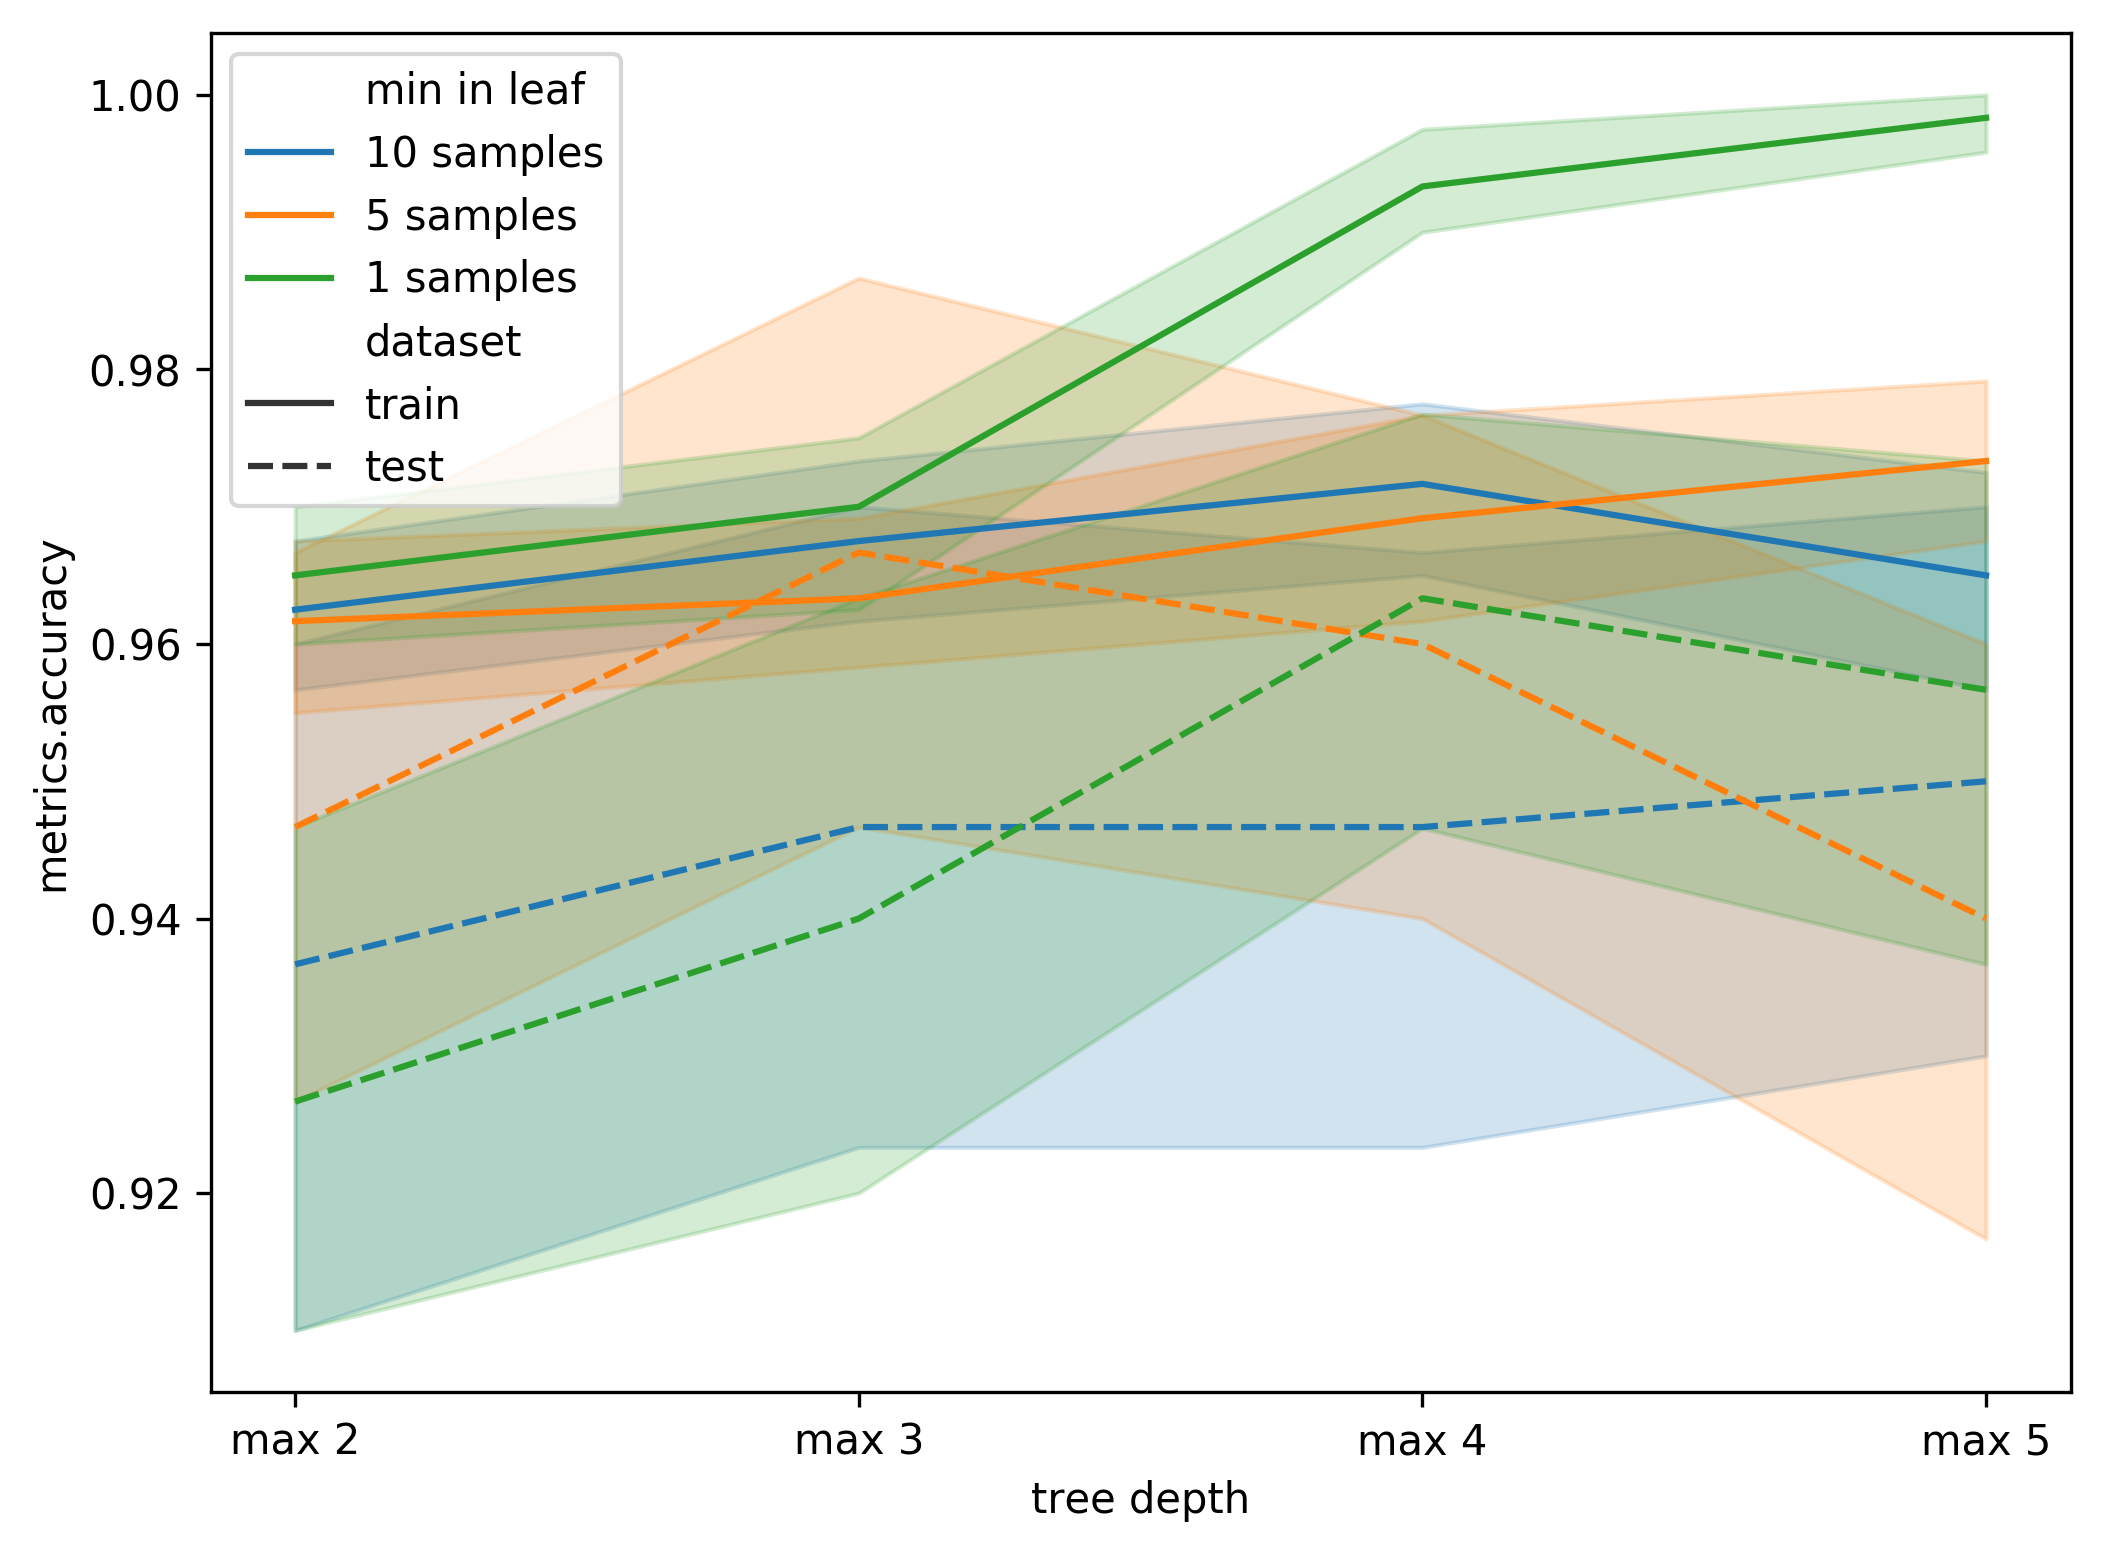

In [61]:
mdf['dataset'] = mdf['context.set']
mdf['min in leaf'] = mdf['labels.min_samples_in_leaf'].astype(str) + ' samples'
mdf['tree depth'] = 'max ' + mdf['labels.tree_depth'].astype(str)
plt.figure(figsize=(8,6),dpi=300)
sns.lineplot(
    data=mdf[(mdf['context.set'].isin(['train', 'test']))], 
    y='metrics.accuracy', 
    x='tree depth', 
    hue='min in leaf', 
    style='dataset'
)

In [ ]:
df = djx.records.get_plan_records_df(experiment_id=75)
plt.figure(figsize=(8,6),dpi=300)
sns.lineplot(
    data=mdf[(mdf['context.set'].isin(['train', 'test']))], 
    y='metrics.accuracy', 
    x='tree depth', 
    hue='labels.min_samples', 
    style='context.set'
)